In [1]:
import qiskit as q
%matplotlib inline

circuit = q.QuantumCircuit(2, 2) # 2 qubits, 2 classical bits

# currently: 0, 0
circuit.x(0) # not gate applied to qubit 0
# 1, 0
circuit.cx(0, 1) # cnot, controlled not. Entangles i.e. Flips 2nd qubit value IF first qubit is a 1
# 1, 1
circuit.measure([0, 1], [0, 1]) # Looking in Schrodinger's box(Value collapses). Direct repr. of qubits to classical bits
circuit.draw()

┌───┐     ┌─┐   
q_0: |0>┤ X ├──■──┤M├───
        └───┘┌─┴─┐└╥┘┌─┐
q_1: |0>─────┤ X ├─╫─┤M├
             └───┘ ║ └╥┘
 c_0: 0 ═══════════╩══╬═
                      ║ 
 c_1: 0 ══════════════╩═

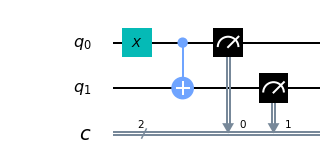

In [2]:
circuit.draw(output = 'mpl')

In [3]:
# Save your account
from qiskit import IBMQ
IBMQ.save_account(open("token.txt","r").read())

configrc.store_credentials:WARNING:2020-04-08 07:21:10,843: Credentials already present. Set overwrite=True to overwrite.


In [4]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [5]:
# Check machines for backend and figure out queue and available qubits per machine
# Choose simulator for practice and while deploying research work try using machine with lowest queue while aving required no. of qubits
provider = IBMQ.get_provider('ibm-q')
for backend in provider.backends():
    try:
        qubit_count = len(backend.properties().qubits)
    except:
        qubit_count = 'simulated'
    print("{} has {} queued and {} qubits".format(backend.name(), backend.status().pending_jobs, qubit_count))

ibmq_qasm_simulator has 3 queued and simulated qubits
ibmqx2 has 5 queued and 5 qubits
ibmq_16_melbourne has 17 queued and 15 qubits
ibmq_vigo has 4 queued and 5 qubits
ibmq_ourense has 2 queued and 5 qubits
ibmq_london has 2 queued and 5 qubits
ibmq_burlington has 3 queued and 5 qubits
ibmq_essex has 3 queued and 5 qubits
ibmq_armonk has 3 queued and 1 qubits


In [6]:
from qiskit.tools.monitor import job_monitor

backend = provider.get_backend('ibmq_london')
job = q.execute(circuit, backend = backend, shots = 500) 
# We need large no. of shots because in each shot when measured qubits collapse to single value. Large no. of shots to figure out the exp. results
job_monitor(job)

Job Status: job has successfully run


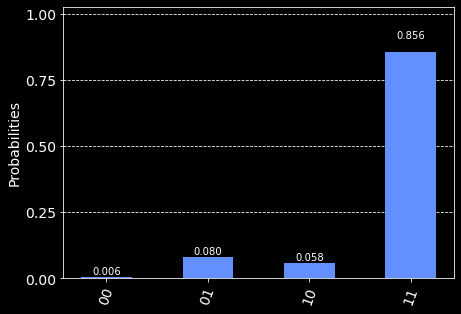

In [7]:
from qiskit.visualization import plot_histogram
from matplotlib import style

style.use('dark_background')
result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])

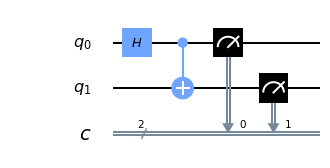

In [8]:
# Run on a simulator(if machine busy or you want a simulation on a perfect quantum comp(noise eliminated))
##backend = provider.get_backend('ibmq_qasm_simulator')
# Till now we examined the entangled property
# Now we will be looking at superposition principle

circuit = q.QuantumCircuit(2, 2) # 2 qubits, 2 classical bits

# currently: 0, 0
circuit.h(0) # hadamard gate applied. Puts the given qubit in superposition
# 1, 0
circuit.cx(0, 1) # cnot, controlled not. Entangles i.e. Flips 2nd qubit value IF first qubit is a 1
# 1, 1
circuit.measure([0, 1], [0, 1]) # Looking in Schrodinger's box(Value collapses). Direct repr. of qubits to classical bits
circuit.draw(output = 'mpl')

In [9]:
job = q.execute(circuit, backend = backend, shots = 500) 
# We need large no. of shots because in each shot when measured qubits collapse to single value. Large no. of shots to figure out the exp. results
job_monitor(job)

Job Status: job has successfully run


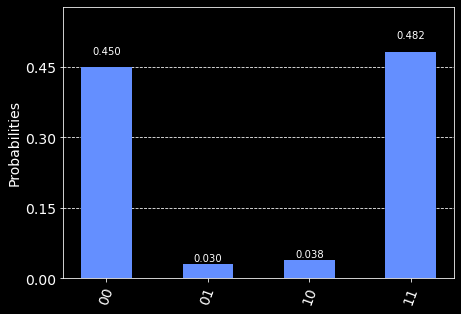

In [10]:
result = job.result()
counts = result.get_counts(circuit)

plot_histogram([counts])
# We had put qubit 1 on superposition and qubit 2 would switch up only when qubit 1 was a 1.
# Shows that we have nearly equal probabilities of having 0 and 1.
# Some practical deviations due to quantum noise.

In [11]:
# Running on a local simulator

from qiskit import Aer # Simulator framework for qiskit
sim_backend = Aer.get_backend('qasm_simulator')
# Checking for available backends
# qasm simulator resembles actual quantum machine closely
for backend in Aer.backends():
    print(backend)

qasm_simulator
statevector_simulator
unitary_simulator
pulse_simulator


In [12]:
job = q.execute(circuit, backend = sim_backend, shots = 500)
job_monitor(job)

Job Status: job has successfully run


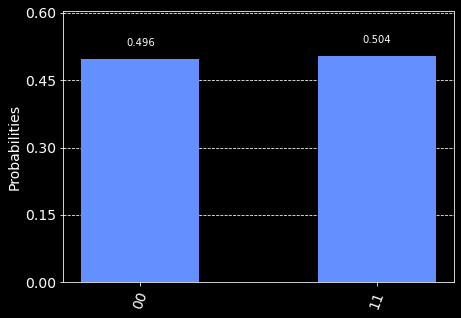

In [13]:
result = job.result()
counts = result.get_counts()
plot_histogram([counts])
# Here we see 
# We had put qubit 1 on superposition and qubit 2 would switch up only when qubit 1 was a 1.
# Shows that we have nearly equal probabilities of having 0 and 1.
# Hence shows superposition principle.